In [260]:
import data_utils
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

dataset = data_utils.get_pqrd_dataset()

display(dataset.head())
dataset.shape


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM,year
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i,2017
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i,2017
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i,2017


(2375371, 47)

In [261]:
import matplotlib.pyplot as plt

import numpy as np

def plot_value_counts(df, feature, title, size):
    df_plot = df[feature].value_counts().nlargest(n=5, keep='first')
    df_plot.plot(kind='barh', title=title, figsize=size, fontsize = 12, alpha=0.2,).invert_yaxis(); 

In [262]:
plt.rcParams.update({'font.size': 12})

def plot_overlap(dataset, feature, top = 5):
    fig, ax = plt.subplots(figsize=(10,7))

    df_risk = dataset[(dataset[feature] != '0') & (dataset['RIESGO_VIDA'] == 'si')][feature].value_counts().nlargest(n = top, keep='first')
    df_risk = df_risk.to_frame().reset_index().rename(columns = {'index': feature, feature:'count'})

    df_no_risk = dataset[(dataset[feature] != '0') & (dataset['RIESGO_VIDA'] == 'no')][feature].value_counts().nlargest(n = top, keep='first')
    df_no_risk = df_no_risk.to_frame().reset_index().rename(columns = {'index': feature, feature:'count'})


    ax1 = ax.barh(df_risk[feature], df_risk['count'], alpha=0.2, label = 'Vida en riesgo', color = 'blue')
    ax2 = ax.barh(df_no_risk[feature], df_no_risk['count'], alpha=0.2, label = 'No vida en riesgo', color = 'green')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Cantidad')
    ax.set_title(feature)
    ax.legend()

    plt.xticks(rotation=45, ha='right');
    plt.show()



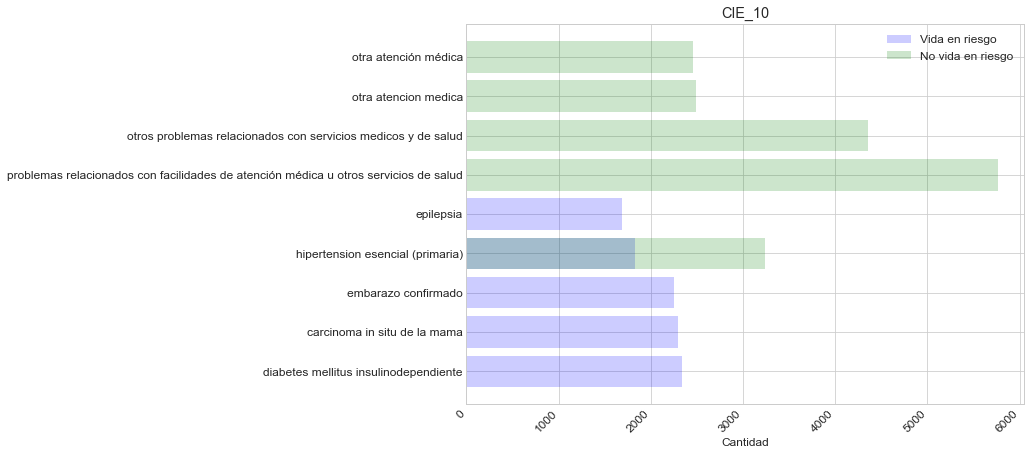

In [263]:
plot_overlap(dataset, 'CIE_10')

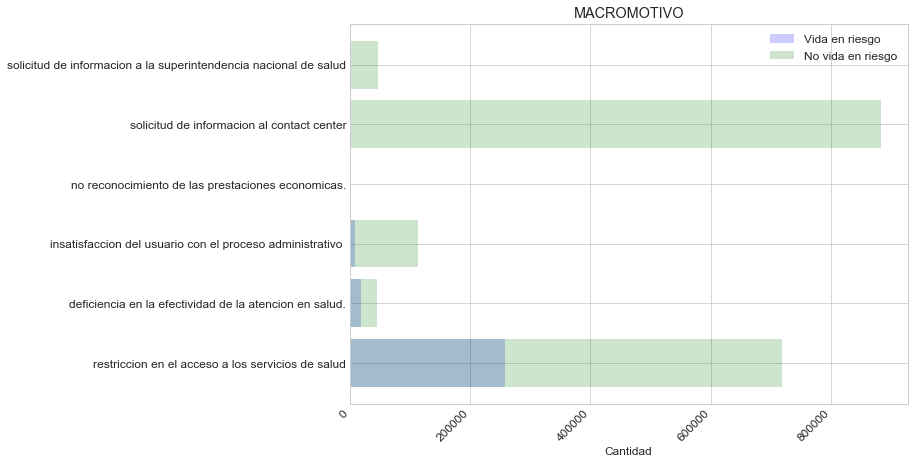

In [264]:
plot_overlap(dataset, 'MACROMOTIVO')

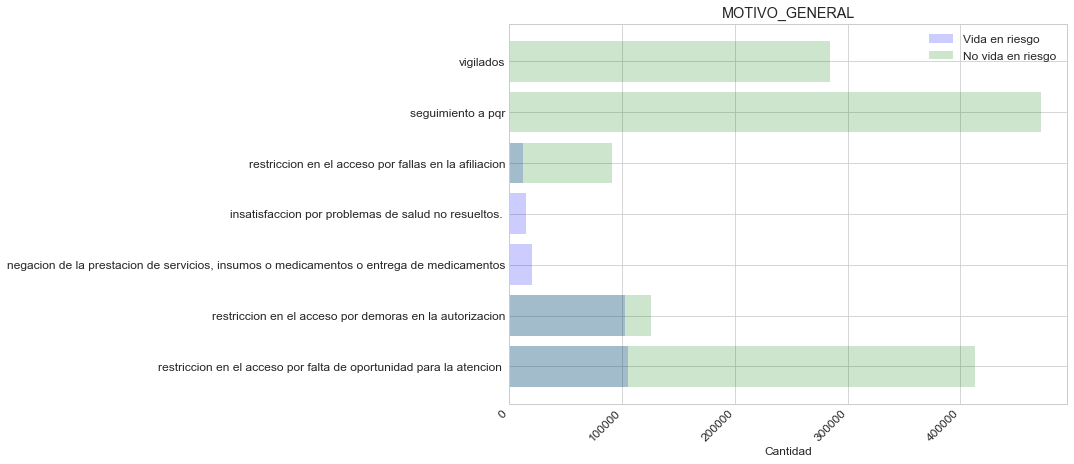

In [265]:
plot_overlap(dataset, 'MOTIVO_GENERAL')

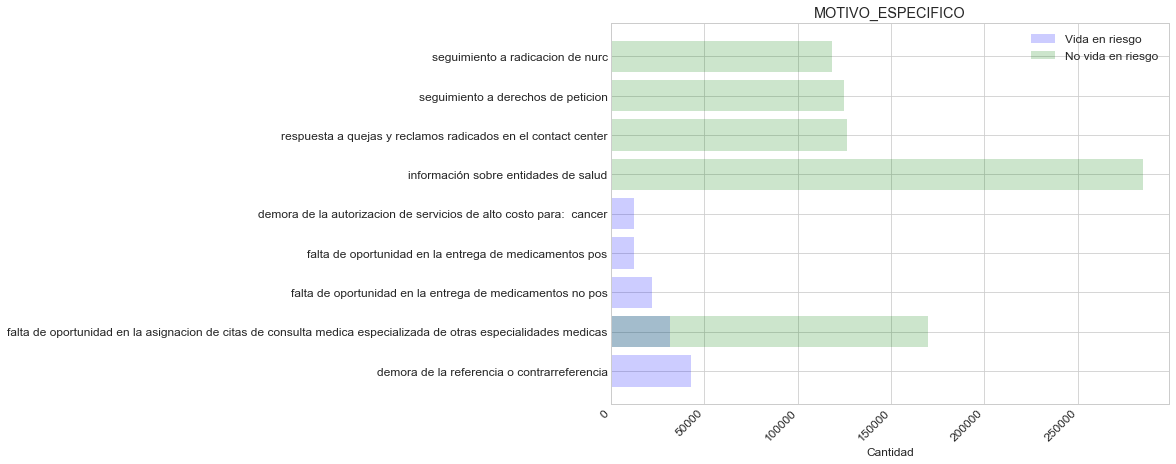

In [266]:
plot_overlap(dataset, 'MOTIVO_ESPECIFICO')

## Is there any part of the population more susceptible to have access to the health care system?

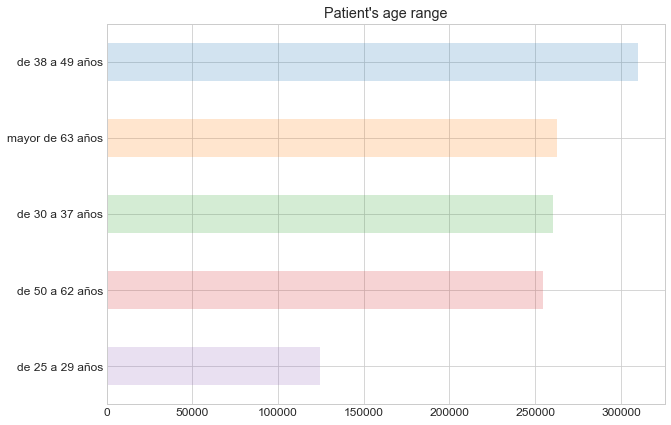

In [288]:
plot_value_counts(dataset[dataset['AFEC_EDADR'] != '0'], 'AFEC_EDADR', 'Patient\'s age range', (10,7))

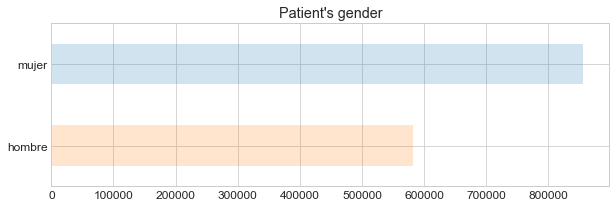

In [268]:
plot_value_counts((dataset[dataset['AFEC_GENERO'] != '0']) , 'AFEC_GENERO', 'Patient\'s gender', (10, 3))


## Top 10 of reasons to raise a pqrd.


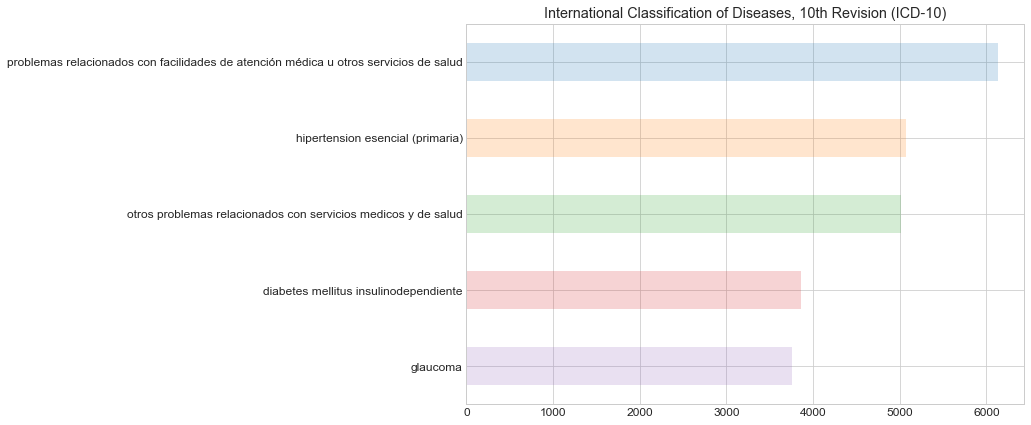

In [269]:
plot_value_counts(dataset[dataset['CIE_10'] != '0'], 'CIE_10', 'International Classification of Diseases, 10th Revision (ICD-10)', (10, 7))



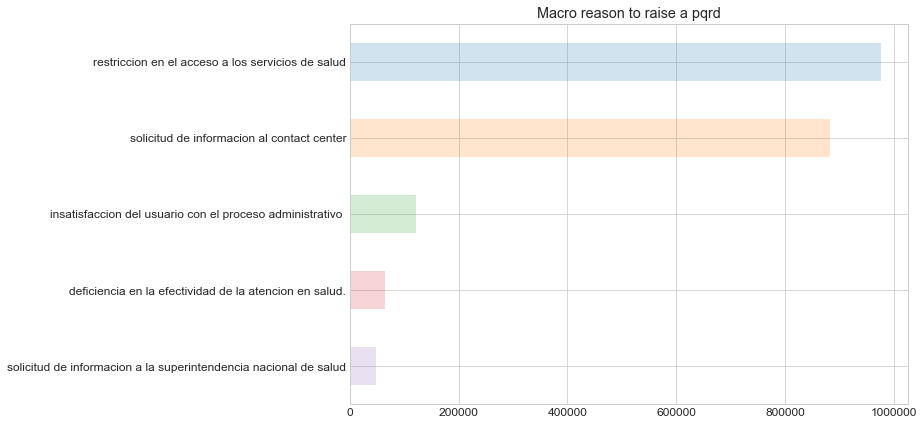

In [270]:
plot_value_counts(dataset[dataset['MACROMOTIVO'] != '0'], 'MACROMOTIVO', 'Macro reason to raise a pqrd', (10, 7))


In [271]:
dataset.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'ALTO_COSTO', 'CIE_10',
       'COD_MACROMOT', 'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC',
       'ENT_COD_DEPTO', 'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_DPTO', 'ENT_MPIO',
       'ENT_MPIO_DANE', 'ENT_NOMBRE', 'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS',
       'IDPATOLOGIA_2', 'IDRANGOEDADES', 'ID_MES', 'MACROMOTIVO', 'MES',
       'MOTIVO_ESPECIFICO', 'MOTIVO_GENERAL', 'PATOLOGIA_1', 'PATOLOGIA_TIPO',
       'PET_COD_DEPTO', 'PET_DPTO', 'PET_MPIO', 'PET_TIPOPER', 'PQR_CANAL',
       'PQR_CLASE_SNS', 'PQR_ESTADO', 'PQR_GRUPOALERTA', 'PQR_TIPOATENCION',
       'PQR_TIPOPETICION', 'RIESGO_VIDA', 'TRIM', 'year'],
      dtype='object')

## Use of internet for raising pqrds over the time.

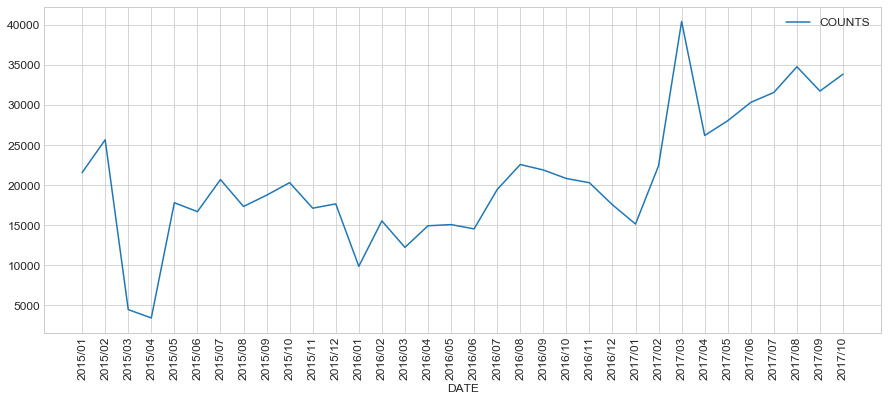

In [272]:
canales_df = dataset.loc[(dataset['PQR_CANAL'] == "chat") | (dataset['PQR_CANAL'] == "correo") | (dataset['PQR_CANAL'] == "web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(15,6), rot=90);




# Integration with CIE 10 Dataset

In [273]:
dataset = data_utils.get_dataset()
cie10_df = pd.read_csv('datasets/CIE10.csv', sep = ';')
cie10_df['DESCRIPCION_COD_CIE_10_04'] = cie10_df['DESCRIPCION_COD_CIE_10_04'].apply(lambda value: value.lower())
dataset_cie10 = pd.merge(left = dataset, right = cie10_df, how = 'left', left_on='CIE_10', right_on='DESCRIPCION_COD_CIE_10_04')

dataset_cie10 = dataset_cie10[dataset_cie10['CAPITULO'].notnull()]
dataset_cie10.head()


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,TRIM,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,trim i,6.0,Enfermedades del sistema nervioso,G40,Epilepsia,G403,epilepsia y sindromes epilepticos idiopaticos ...,NaN,NaN,NaN
7,santander,de 13 a 17 años,secundaria,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,trim i,19.0,"Traumatismos, envenenamiento y algunas otras c...",S83,"Luxacion, Esguince Y Torcedura De Articulacion...",S833,desgarro del cartilago articular de la rodilla...,NaN,NaN,NaN
18,tolima,de 13 a 17 años,posgrado,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,trim i,17.0,"Malformaciones congenitas, deformidades y anom...",Q87,Otros Sindromes De Malformaciones Congenitas E...,Q874,sindrome de marfan,NaN,NaN,NaN
19,santander,de 6 a 12 años,ninguno,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,trim i,13.0,Enfermedades del sistema osteomuscular y del t...,M72,Trastornos Fibroblasticos,M724,fibromatosis seudosarcomatosa,NaN,NaN,NaN
22,bogota d.c.,de 6 a 12 años,ninguno,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,trim i,21.0,Factores que influyen en el estado de salud y ...,Z75,Problemas Relacionados Con Facilidades De Aten...,Z758,otros problemas relacionados con servicios med...,NaN,NaN,NaN


In [274]:
print(dataset_cie10.shape)

(175360, 55)


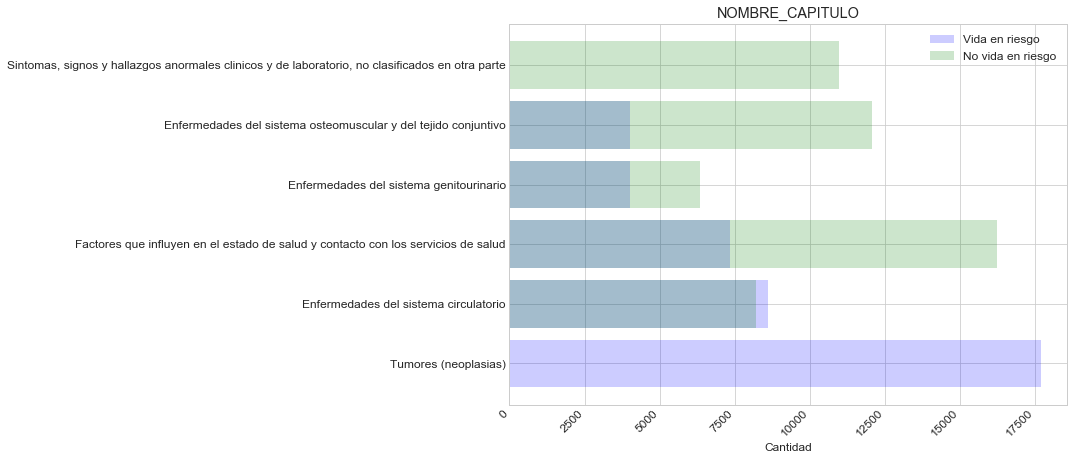

In [275]:
plot_overlap(dataset_cie10, 'NOMBRE_CAPITULO')

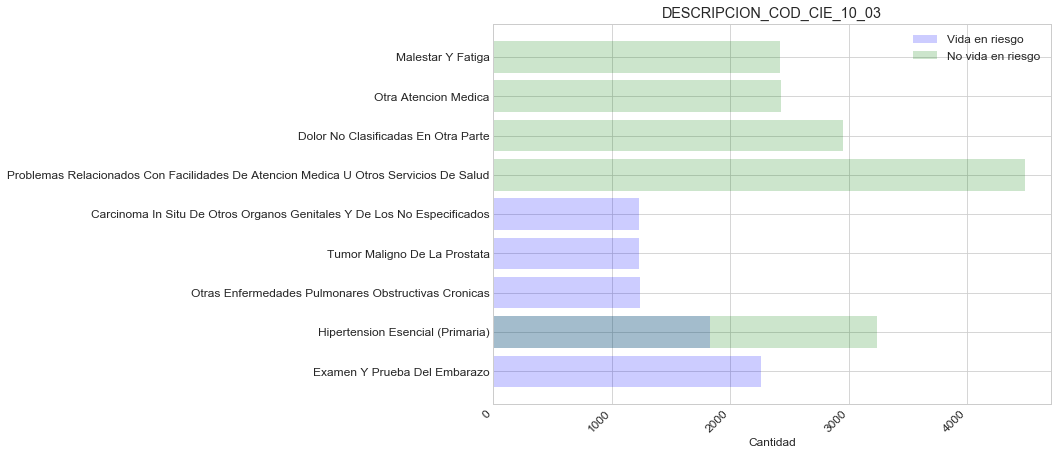

In [276]:
plot_overlap(dataset_cie10, 'DESCRIPCION_COD_CIE_10_03')

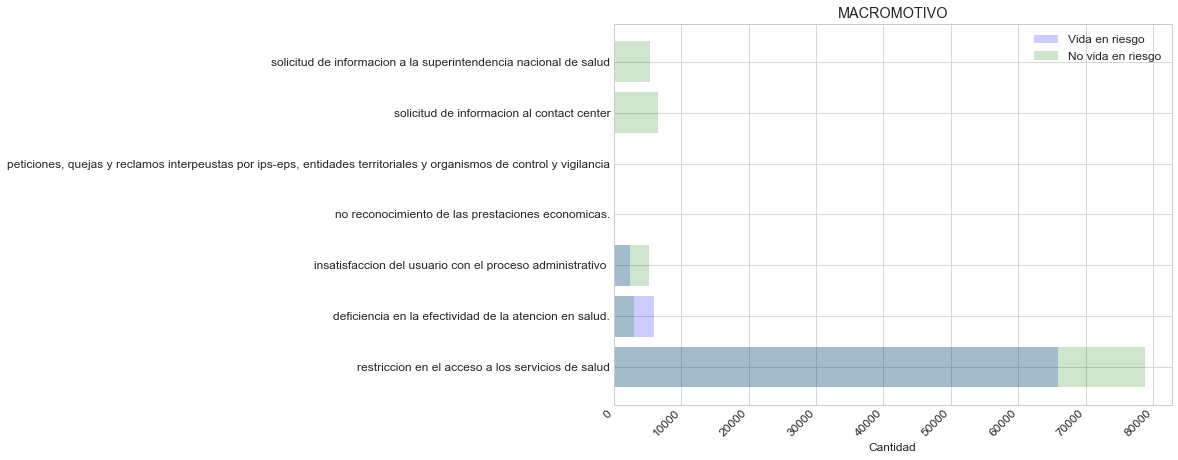

In [277]:
plot_overlap(dataset_cie10, 'MACROMOTIVO')

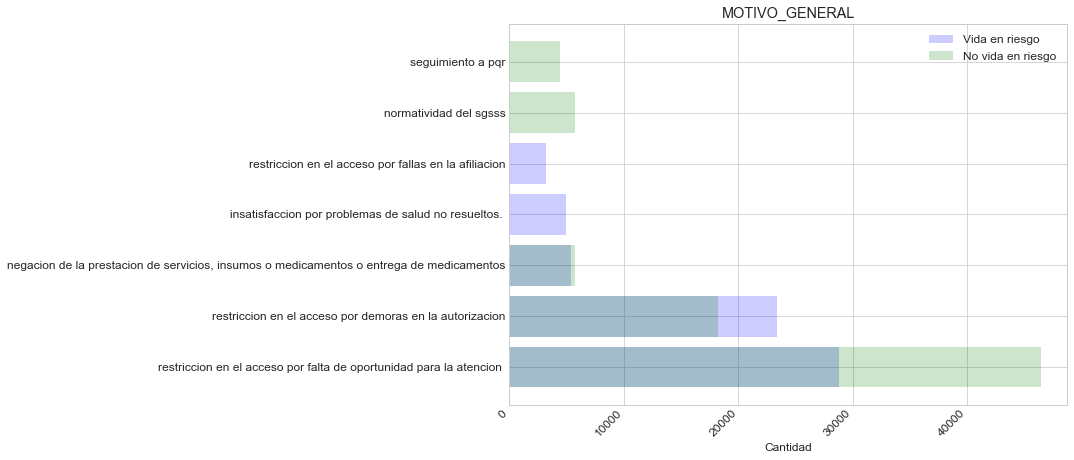

In [278]:
plot_overlap(dataset_cie10, 'MOTIVO_GENERAL')

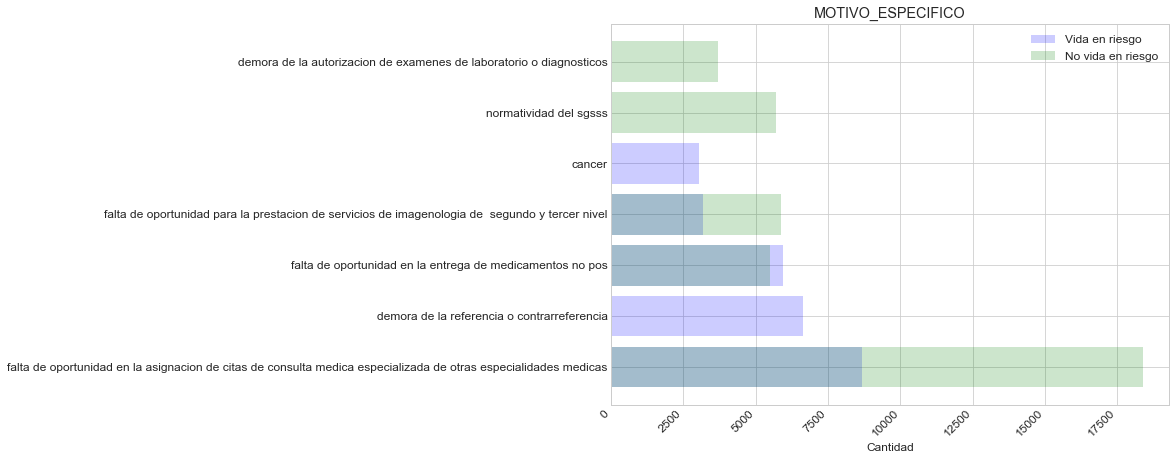

In [279]:
plot_overlap(dataset_cie10, 'MOTIVO_ESPECIFICO')